In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import plotly.express as px

from scipy.stats import mannwhitneyu
from scipy.stats import spearmanr

sns.set_theme(style = 'darkgrid')
sns.set(rc={'figure.figsize':(20,10)})

# EDA + Data Cleaning/Preparation

## Missed values

In [2]:
data = pd.read_csv('marketing_data.csv')
data.head()

ID  Year_Birth   Education Marital_Status      Income   Kidhome  \
0   1826        1970  Graduation       Divorced  $84,835.00         0   
1      1        1961  Graduation         Single  $57,091.00         0   
2  10476        1958  Graduation        Married  $67,267.00         0   
3   1386        1967  Graduation       Together  $32,474.00         1   
4   5371        1989  Graduation         Single  $21,474.00         1   

   Teenhome Dt_Customer  Recency  MntWines  ...  NumStorePurchases  \
0         0     6/16/14        0       189  ...                  6   
1         0     6/15/14        0       464  ...                  7   
2         1     5/13/14        0       134  ...                  5   
3         1     5/11/14        0        10  ...                  2   
4         0      4/8/14        0         6  ...                  2   

   NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  \
0                  1             0             0             0             0   
1                  5             0             0             0             0   
2                  2             0             0             0             0   
3                  7             0             0             0             0   
4                  7             1             0             0             0   

   AcceptedCmp2  Response  Complain  Country  
0             0         1         0       SP  
1             1         1         0       CA  
2             0         0         0       US  
3             0         0         0      AUS  
4             0         1         0       SP  

[5 rows x 28 columns]

In [3]:
data.columns = [x.strip() for x in data.columns]

In [4]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

Kidhome - number of kids at home <br>
Teenhome - number of teenagers at home <br>
Dt_Customer - date of customer's enrollment with the company <br>
Recency - number of days since last purchase <br>
NumDealsPurchases - number of purchases made with a discount <br>
Other Num... similary <br>
MntWines - amount spent on wine <br>
Other Mnt... similary <br>
AcceptedCmpN - 1 if customer accepted the offer in Nth campaign, 0 otherwise <br>
Response - 1 if customer accepted the offer in last campaign, 0 otherwise <br>
Complain - 1 if customer complained in the last 2 years, 0 otherwise <br>

In [5]:
data[data.isnull().any(axis=1)]

ID  Year_Birth   Education Marital_Status Income  Kidhome  Teenhome  \
134    8996        1957         PhD        Married    NaN        2         1   
262    1994        1983  Graduation        Married    NaN        1         0   
394    3769        1972         PhD       Together    NaN        1         0   
449    5255        1986  Graduation         Single    NaN        1         0   
525    8268        1961         PhD        Married    NaN        0         1   
590   10629        1973    2n Cycle        Married    NaN        1         0   
899   10475        1970      Master       Together    NaN        0         1   
997    9235        1957  Graduation         Single    NaN        1         1   
1096   4345        1964    2n Cycle         Single    NaN        1         1   
1185   7187        1969      Master       Together    NaN        1         1   
1213   8720        1978    2n Cycle       Together    NaN        0         0   
1312   8557        1982  Graduation         Single    NaN        1         0   
1515   2863        1970  Graduation         Single    NaN        1         2   
1558   2437        1989  Graduation        Married    NaN        0         0   
1693   5250        1943      Master          Widow    NaN        0         0   
1804   7281        1959         PhD         Single    NaN        0         0   
1858   1612        1981         PhD         Single    NaN        1         0   
1863   5079        1971  Graduation        Married    NaN        1         1   
1880  10339        1954      Master       Together    NaN        0         1   
1967   5798        1973      Master       Together    NaN        0         0   
1983   2902        1958  Graduation       Together    NaN        1         1   
2139   3117        1955  Graduation         Single    NaN        0         1   
2165   7244        1951  Graduation         Single    NaN        2         1   
2170   1295        1963  Graduation        Married    NaN        0         1   

     Dt_Customer  Recency  MntWines  ...  NumStorePurchases  \
134     11/19/12        4       230  ...                  8   
262     11/15/13       11         5  ...                  2   
394       3/2/14       17        25  ...                  3   
449      2/20/13       19         5  ...                  0   
525      7/11/13       23       352  ...                  7   
590      9/14/12       25        25  ...                  3   
899       4/1/13       39       187  ...                  6   
997      5/27/14       45         7  ...                  2   
1096     1/12/14       49         5  ...                  2   
1185     5/18/13       52       375  ...                  4   
1213     8/12/12       53        32  ...                  1   
1312     6/17/13       57        11  ...                  3   
1515     8/23/13       67       738  ...                 10   
1558      6/3/13       69       861  ...                 12   
1693    10/30/13       75       532  ...                 11   
1804     11/5/13       80        81  ...                  4   
1858     5/31/13       82        23  ...                  3   
1863      3/3/13       82        71  ...                  3   
1880     6/23/13       83       161  ...                  4   
1967    11/23/13       87       445  ...                  8   
1983      9/3/12       87        19  ...                  3   
2139    10/18/13       95       264  ...                  5   
2165      1/1/14       96        48  ...                  4   
2170     8/11/13       96       231  ...                  7   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
134                   9             0             0             0   
262                   7             0             0             0   
394                   7             0             0             0   
449                   1             0             0             0   
525                   6             0             0             0   
590               

In [6]:
data[data.isnull().any(axis=1)].isnull().any(axis=0)

ID                     False
Year_Birth             False
Education              False
Marital_Status         False
Income                  True
Kidhome                False
Teenhome               False
Dt_Customer            False
Recency                False
MntWines               False
MntFruits              False
MntMeatProducts        False
MntFishProducts        False
MntSweetProducts       False
MntGoldProds           False
NumDealsPurchases      False
NumWebPurchases        False
NumCatalogPurchases    False
NumStorePurchases      False
NumWebVisitsMonth      False
AcceptedCmp3           False
AcceptedCmp4           False
AcceptedCmp5           False
AcceptedCmp1           False
AcceptedCmp2           False
Response               False
Complain               False
Country                False
dtype: bool

**Missed values only in income column** <br>
The column is income and below we'll conclude that income information was taken directly from clients, so probably these 24 decided to not to provid this info.

## Duplicates

In [7]:
data.duplicated(keep='last').value_counts()

False    2240
dtype: int64

In [8]:
data.loc[:].duplicated(subset=['Income']).value_counts()

False    1975
True      265
dtype: int64

In [9]:
data.loc[:].duplicated(subset=['Dt_Customer', 'Income']).value_counts()

False    2034
True      206
dtype: int64

In [10]:
data.loc[:].duplicated(subset=['Dt_Customer', 'Income', 'Education']).value_counts()

False    2035
True      205
dtype: int64

In [11]:
data[data.loc[:].duplicated(subset=['Dt_Customer', 'Income', 'Education'], keep=False)]

ID  Year_Birth   Education Marital_Status       Income  Kidhome  \
8      4047        1954         PhD        Married  $65,324.00         0   
9      9477        1954         PhD        Married  $65,324.00         0   
15      837        1977  Graduation        Married  $54,809.00         1   
16    10521        1977  Graduation        Married  $54,809.00         1   
26     5430        1956  Graduation       Together  $54,450.00         1   
...     ...         ...         ...            ...          ...      ...   
2225   7212        1966  Graduation        Married  $44,794.00         0   
2229   2106        1974    2n Cycle        Married  $20,130.00         0   
2230   3363        1974    2n Cycle        Married  $20,130.00         0   
2231   8595        1973  Graduation          Widow  $42,429.00         0   
2232   7232        1973  Graduation          Widow  $42,429.00         0   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumStorePurchases  \
8            1     1/11/14        0       384  ...                  9   
9            1     1/11/14        0       384  ...                  9   
15           1     9/11/13        0        63  ...                  5   
16           1     9/11/13        0        63  ...                  5   
26           1     9/14/12        0       454  ...                  8   
...        ...         ...      ...       ...  ...                ...   
2225         1      6/8/14       99        54  ...                  3   
2229         0     3/17/14       99         0  ...                  3   
2230         0     3/17/14       99         0  ...                  3   
2231         1     2/11/14       99        55  ...                  3   
2232         1     2/11/14       99        55  ...                  3   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
8                     4             0             0             0   
9                     4             0             0             0   
15                    4             0             0             0   
16                    4             0             0             0   
26                    8             0             0             0   
...                 ...           ...           ...           ...   
2225                  6             0             0             0   
2229                  8             0             0             0   
2230                  8             0             0             0   
2231                  5             0             0             0   
2232                  5             0             0             0   

      AcceptedCmp1  AcceptedCmp2  Response  Complain  Country  
8                0             0         0         0       US  
9                0             0         0         0      IND  
15               0             0         0         0       SP  
16               0             0         1         0       SP  
26               0             0         0         0       SP  
...            ...           ...       ...       ...      ...  
2225             0             0         0         0      AUS  
2229             0             0         0         0       SP  
2230             0             0         0         0       SP  
2231             0             0         0         0      AUS  
2232             0             0         0         0       SP  

[400 rows x 28 columns]

The information that changes is usually country. We'll assume that the higher ID is - later the information was entered in the database.

In [12]:
data = data.sort_values('ID').drop_duplicates(subset=['Dt_Customer', 'Income', 'Education'], keep='last')

## Types

In [13]:
data.dtypes

ID                      int64
Year_Birth              int64
Education              object
Marital_Status         object
Income                 object
Kidhome                 int64
Teenhome                int64
Dt_Customer            object
Recency                 int64
MntWines                int64
MntFruits               int64
MntMeatProducts         int64
MntFishProducts         int64
MntSweetProducts        int64
MntGoldProds            int64
NumDealsPurchases       int64
NumWebPurchases         int64
NumCatalogPurchases     int64
NumStorePurchases       int64
NumWebVisitsMonth       int64
AcceptedCmp3            int64
AcceptedCmp4            int64
AcceptedCmp5            int64
AcceptedCmp1            int64
AcceptedCmp2            int64
Response                int64
Complain                int64
Country                object
dtype: object

In [14]:
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'])

In [15]:
data['Dt_Customer'].min()

Timestamp('2012-07-30 00:00:00')

In [16]:
data['Dt_Customer'].max()

Timestamp('2014-06-29 00:00:00')

In [17]:
categorical_set = set(['Education', 'Marital_Status', 'Dt_Customer', 'AcceptedCmp1', 'AcceptedCmp2',
                       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Complain', 'Country'])
continuous_set = set(data.columns).difference(categorical_set)
categorical = list(categorical_set)
continuous  =  list(continuous_set)
continuous.remove('ID')

In [18]:
data.describe()

ID   Year_Birth      Kidhome     Teenhome      Recency  \
count   2035.000000  2035.000000  2035.000000  2035.000000  2035.000000   
mean    5785.790663  1968.760197     0.444717     0.507617    49.143980   
std     3244.550652    11.983703     0.537909     0.547018    28.972004   
min        0.000000  1893.000000     0.000000     0.000000     0.000000   
25%     2990.500000  1959.000000     0.000000     0.000000    24.000000   
50%     5788.000000  1970.000000     0.000000     0.000000    49.000000   
75%     8646.500000  1977.000000     1.000000     1.000000    74.000000   
max    11191.000000  1996.000000     2.000000     2.000000    99.000000   

          MntWines    MntFruits  MntMeatProducts  MntFishProducts  \
count  2035.000000  2035.000000      2035.000000      2035.000000   
mean    303.642260    26.365111       167.799017        37.419165   
std     336.024075    39.843016       227.970725        54.629752   
min       0.000000     0.000000         0.000000         0.000000   
25%      23.000000     2.000000        16.000000         3.000000   
50%     174.000000     8.000000        68.000000        12.000000   
75%     504.000000    33.000000       230.000000        50.000000   
max    1493.000000   199.000000      1725.000000       259.000000   

       MntSweetProducts  ...  NumCatalogPurchases  NumStorePurchases  \
count       2035.000000  ...          2035.000000        2035.000000   
mean          27.259951  ...             2.660442           5.774939   
std           41.730049  ...             2.937765           3.238695   
min            0.000000  ...             0.000000           0.000000   
25%            1.000000  ...             0.000000           3.000000   
50%            8.000000  ...             2.000000           5.000000   
75%           34.000000  ...             4.000000           8.000000   
max          263.000000  ...            28.000000          13.000000   

       NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
count        2035.000000   2035.000000   2035.000000   2035.000000   
mean            5.310565      0.072236      0.076167      0.072236   
std             2.439002      0.258942      0.265330      0.258942   
min             0.000000      0.000000      0.000000      0.000000   
25%             3.000000      0.000000      0.000000      0.000000   
50%             6.000000      0.000000      0.000000      0.000000   
75%             7.000000      0.000000      0.000000      0.000000   
max            20.000000      1.000000      1.000000      1.000000   

       AcceptedCmp1  AcceptedCmp2     Response     Complain  
count   2035.000000   2035.000000  2035.000000  2035.000000  
mean       0.065848      0.012776     0.148403     0.009828  
std        0.248077      0.112336     0.355586     0.098672  
min        0.000000      0.000000     0.000000     0.000000  
25%        0.000000      0.000000     0.000000     0.000000  
50%        0.000000      0.000000     0.000000     0.000000  
75%        0.000000      0.000000     0.000000     0.000000  
max        1.000000      1.000000     1.000000     1.000000  

[8 rows x 23 columns]

## Visualization

In [19]:
def subplots(func, data, rows, cols, x=None, y=None, hue=None):
    '''
        creating subplots with provided func over x
        func - visualization func
        data - data for plotting
        rows - number of rows
        cols - number of columns
        x - list of column to iterate through on axis x
        y - list of column to iterate through on axis y
    '''
    fig, axes = plt.subplots(nrows=rows, ncols=cols)
    axes = axes.reshape(rows*cols)
    plt.subplots_adjust(hspace=0.6, wspace=0.4)

    for column, ax in zip(x, axes):
        func(data=data, x=column, ax=ax, hue=hue)

#### Converting Income to float

In [20]:
data['Income']

1503     $70,951.00 
1        $57,091.00 
1311     $25,358.00 
1834     $60,491.00 
2237     $46,310.00 
            ...     
1554     $42,394.00 
1925    $156,924.00 
529      $26,487.00 
1897     $26,091.00 
261      $41,411.00 
Name: Income, Length: 2035, dtype: object

In [21]:
data['Income'].fillna('0', inplace=True)
data['Income'] = [float(re.sub('[,$]', '', inc)) for inc in data['Income']]
data.loc[data['Income'] == 0, 'Income'] = np.nan

**Continuous variables**

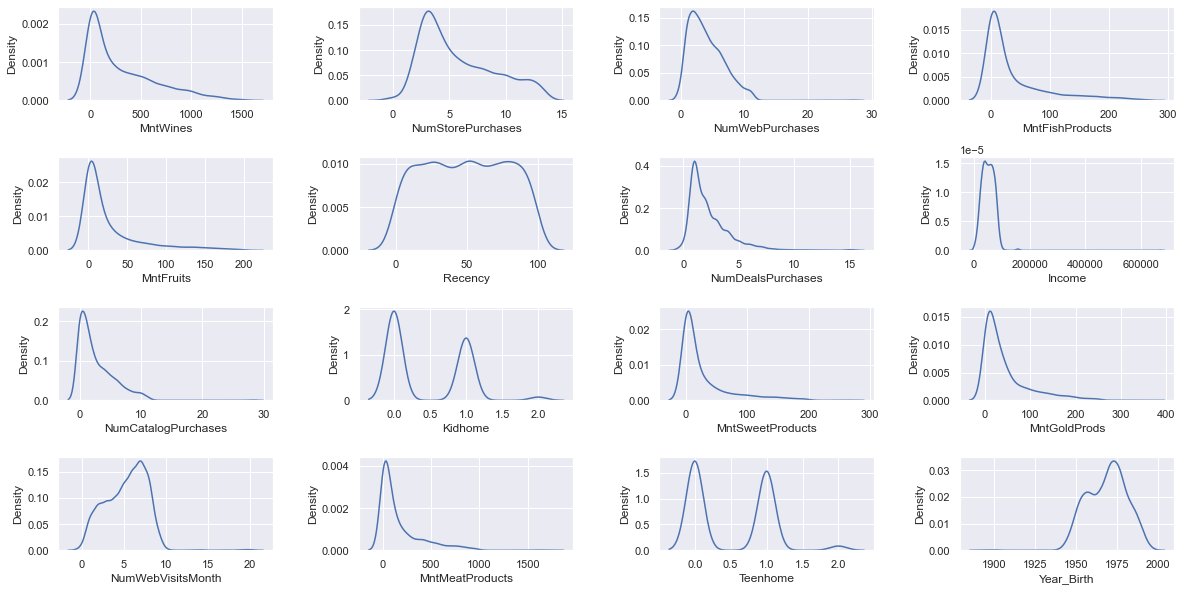

In [22]:
subplots(sns.kdeplot, data, 4, 4, x=continuous)

In [23]:
categorical.remove('Dt_Customer')

**Categorical**

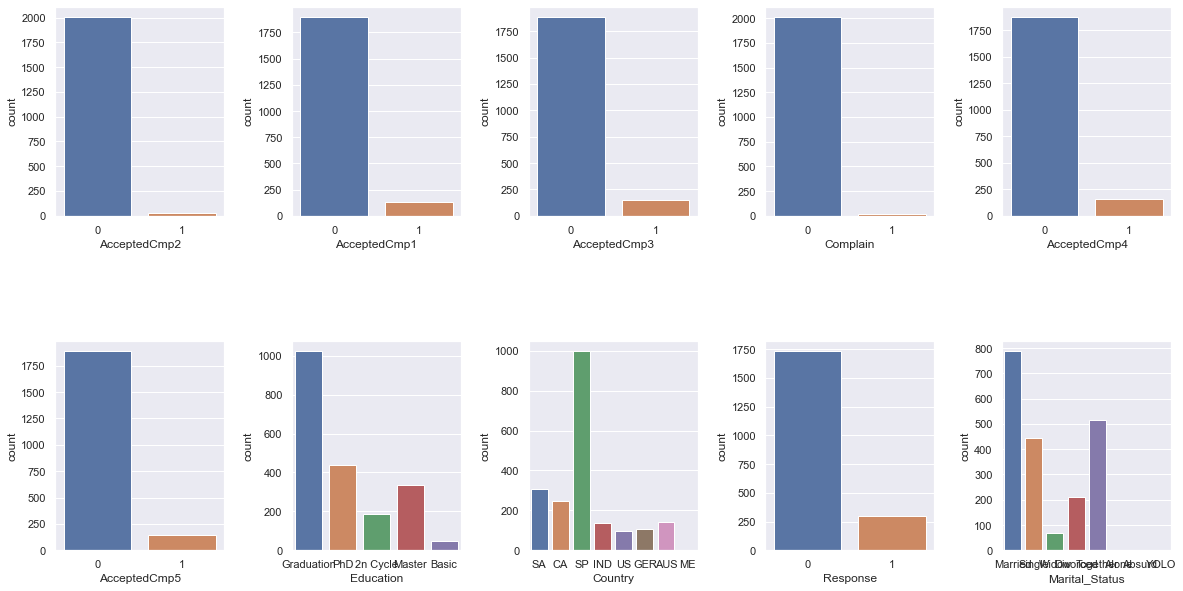

In [24]:
subplots(sns.countplot, data, 2, 5, categorical)

**New clients by month**

<AxesSubplot:xlabel='Dt_Customer', ylabel='ID'>

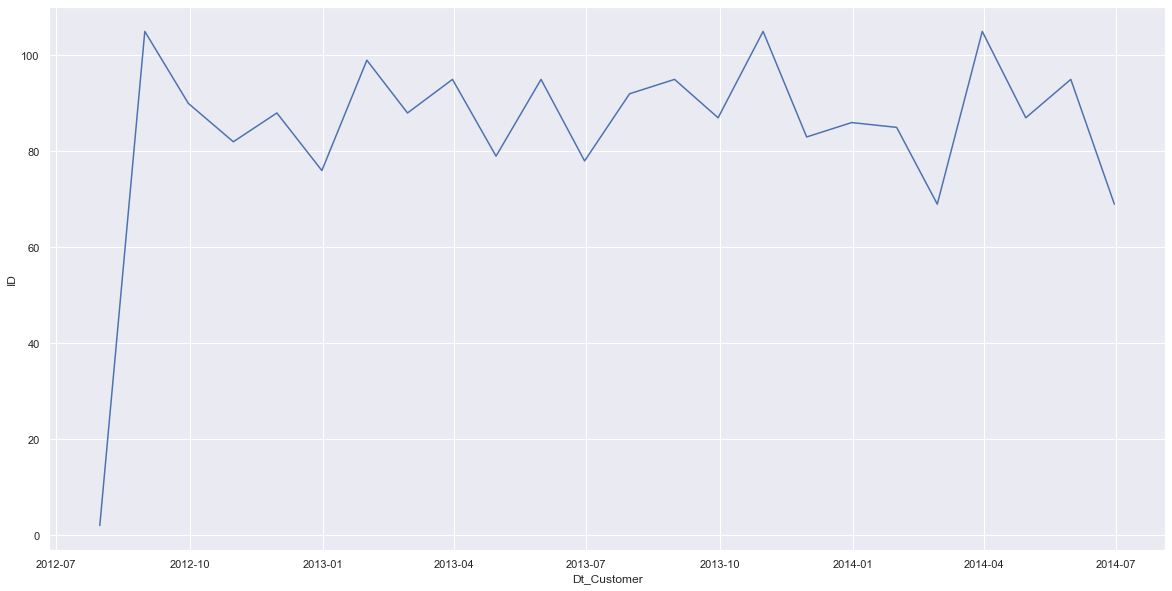

In [25]:
sns.lineplot(data=data.groupby(pd.Grouper(key='Dt_Customer', freq='M')).count(), x='Dt_Customer', y='ID')

<AxesSubplot:>

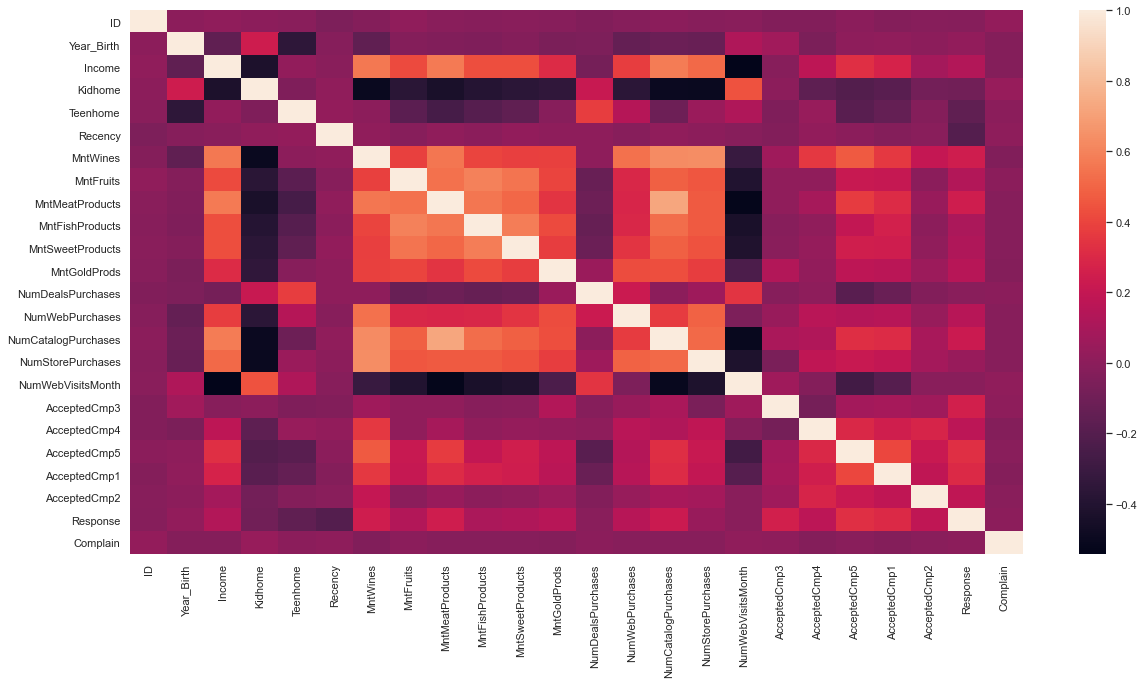

In [26]:
corr = data.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

## Variables analysis

### Adding age

In [27]:
def client_age(row):
    return 2014 - row['Year_Birth']

In [28]:
data['Age'] = data.apply(client_age, axis=1)

### Income and Education

<AxesSubplot:xlabel='Education', ylabel='Income'>

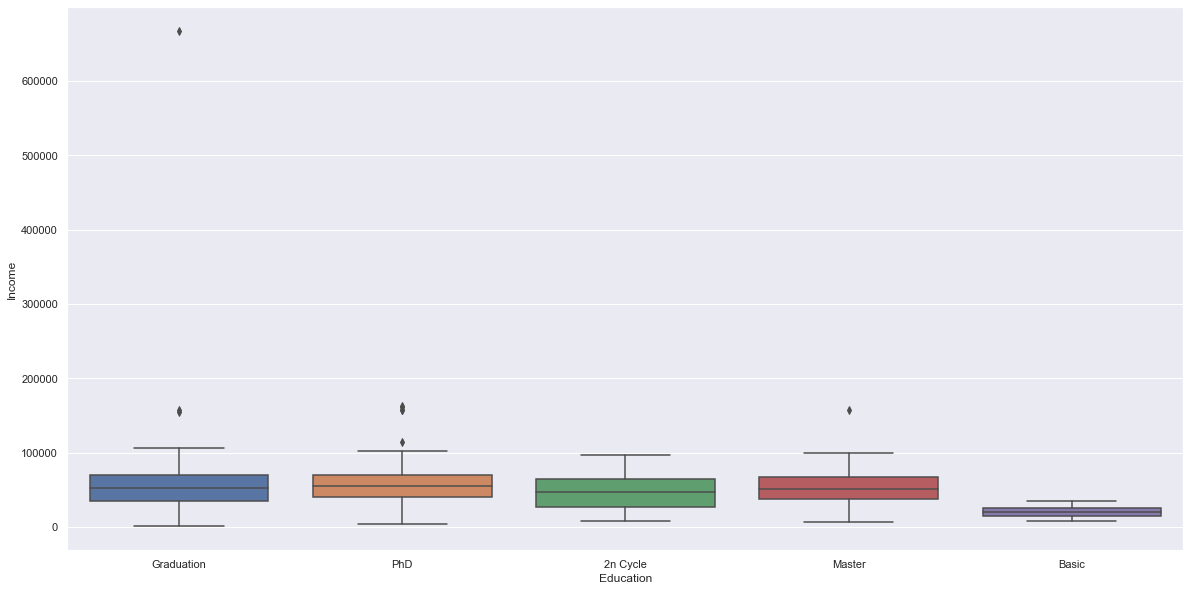

In [29]:
sns.boxplot(data=data, y='Income', x='Education')

**There are some outliers**

In [30]:
data[data['Income'] > 600000]

ID  Year_Birth   Education Marital_Status    Income  Kidhome  Teenhome  \
527  9432        1977  Graduation       Together  666666.0        1         0   

    Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
527  2013-06-02       23         9  ...                  6             0   

     AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Response  \
527             0             0             0             0         0   

     Complain  Country  Age  
527         0       SA   37  

[1 rows x 29 columns]

The income value for outlier is 666666. This looks like some kind of mistake or joke. <br>

But overall situation looks good and fair.

In [31]:
data[data['Income'] > 100000]

ID  Year_Birth   Education Marital_Status    Income  Kidhome  \
497    1501        1982         PhD        Married  160803.0        0   
731    1503        1976         PhD       Together  162397.0        1   
1244   2798        1977         PhD       Together  102160.0        0   
832    4611        1970  Graduation       Together  105471.0        0   
210    4619        1945         PhD         Single  113734.0        0   
325    4931        1977  Graduation       Together  157146.0        0   
853    5336        1971      Master       Together  157733.0        1   
1826   5555        1975  Graduation       Divorced  153924.0        0   
1564   7215        1983  Graduation         Single  101970.0        0   
2204   8475        1973         PhD        Married  157243.0        0   
527    9432        1977  Graduation       Together  666666.0        1   
142   10089        1974  Graduation       Divorced  102692.0        0   
1925  11181        1949         PhD        Married  156924.0        0   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
497          0  2012-08-04       21        55  ...                  0   
731          1  2013-06-03       31        85  ...                  1   
1244         0  2012-11-02       54       763  ...                  4   
832          0  2013-01-21       36      1009  ...                  3   
210          0  2014-05-28        9         6  ...                  1   
325          0  2013-04-29       13         1  ...                  1   
853          0  2013-06-04       37        39  ...                  1   
1826         0  2014-02-07       81         1  ...                  0   
1564         0  2013-03-12       69       722  ...                  2   
2204         1  2014-03-01       98        20  ...                  0   
527          0  2013-06-02       23         9  ...                  6   
142          0  2013-04-05        5       168  ...                  2   
1925         0  2013-08-29       85         2  ...                  0   

      AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
497              0             0             0             0             0   
731              0             0             0             0             0   
1244             0             1             1             1             0   
832              0             0             1             1             0   
210              0             0             0             0             0   
325              0             0             0             0             0   
853              0             0             0             0             0   
1826             0             0             0             0             0   
1564             0             1             1             1             0   
2204             0             0             0             0             0   
527              0             0             0             0             0   
142              0             1             1             1             1   
1925             0             0             0             0             0   

      Response  Complain  Country  Age  
497          0         0       US   32  
731          0         0       SP   38  
1244         1         0       SA   37  
832          1         0       SP   44  
210          0         0       SP   69  
325          0         0       SA   37  
853          0         0       SP   43  
1826         0         0       SP   39  
1564         1         0       CA   31  
2204         0         0      IND   41  
527          0         0       SA   37  
142          1         0       SA   40  
1925         0         0       CA   65  

[13 rows x 29 columns]

**We'll fill devil outlier with average income for clients similar to him (based on children, education and age)**

In [32]:
mod_data = data[data['Income'] < 600000]

In [33]:
mod_data['Age'].between(35,40)

1503    False
1       False
1311    False
1834    False
2237     True
        ...  
1554    False
1925    False
529      True
1897    False
261     False
Name: Age, Length: 2010, dtype: bool

In [34]:
print('count')
print(mod_data.loc[(mod_data['Teenhome'] == 0 ) & (mod_data['Kidhome'] == 1) &
              (mod_data['Education'] == 'Graduation') & (mod_data['Age'].between(35,40)), 'Income'].shape[0])
print('mean')
print(mod_data.loc[(mod_data['Teenhome'] == 0 ) & (mod_data['Kidhome'] == 1) &
              (mod_data['Education'] == 'Graduation') & (mod_data['Age'].between(35,40)), 'Income'].mean())

count
62
mean
31901.854838709678


In [35]:
data.loc[527, 'Income'] = 31902

<AxesSubplot:xlabel='Education', ylabel='count'>

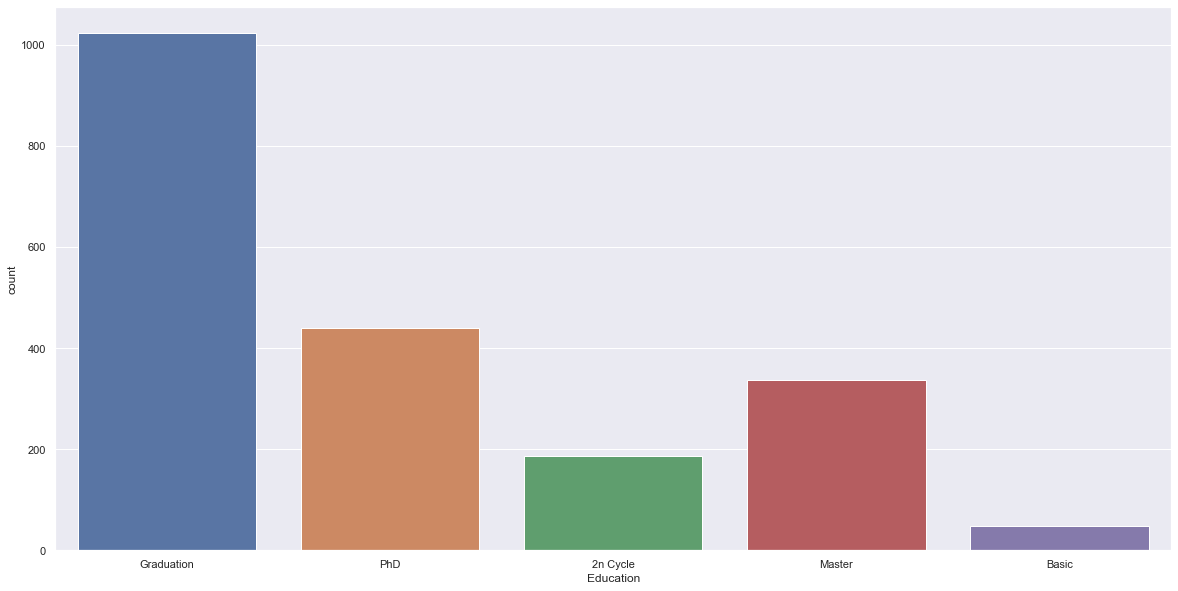

In [36]:
sns.countplot(data=data, x='Education')

We should also compare age of clients with their education

<AxesSubplot:xlabel='Education', ylabel='Age'>

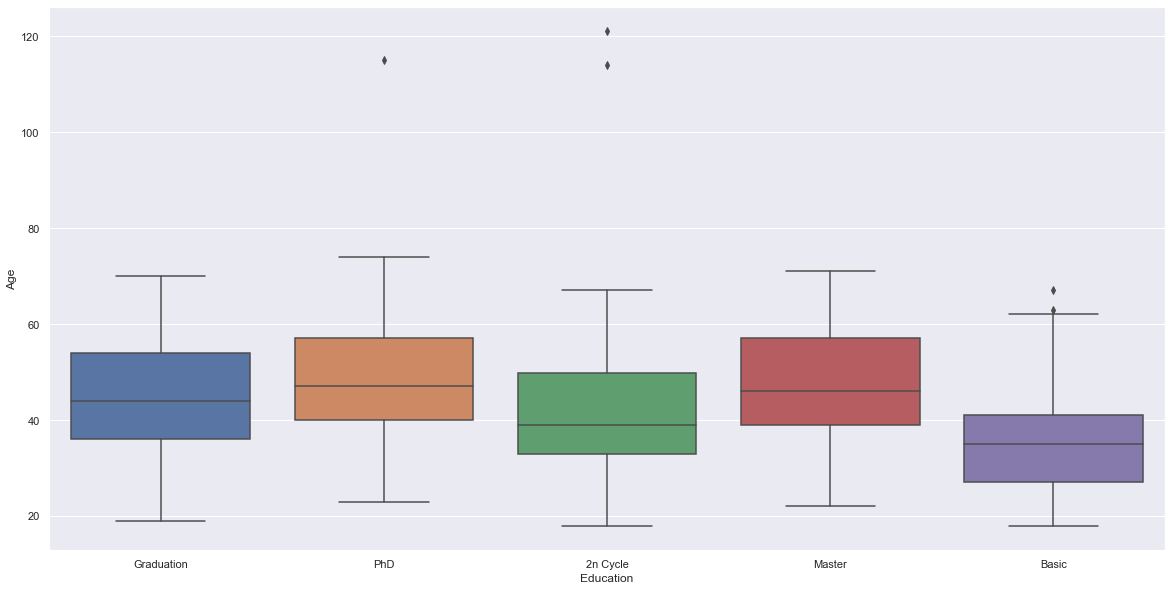

In [37]:
sns.boxplot(data=data, y='Age', x='Education')

<AxesSubplot:xlabel='Education', ylabel='count'>

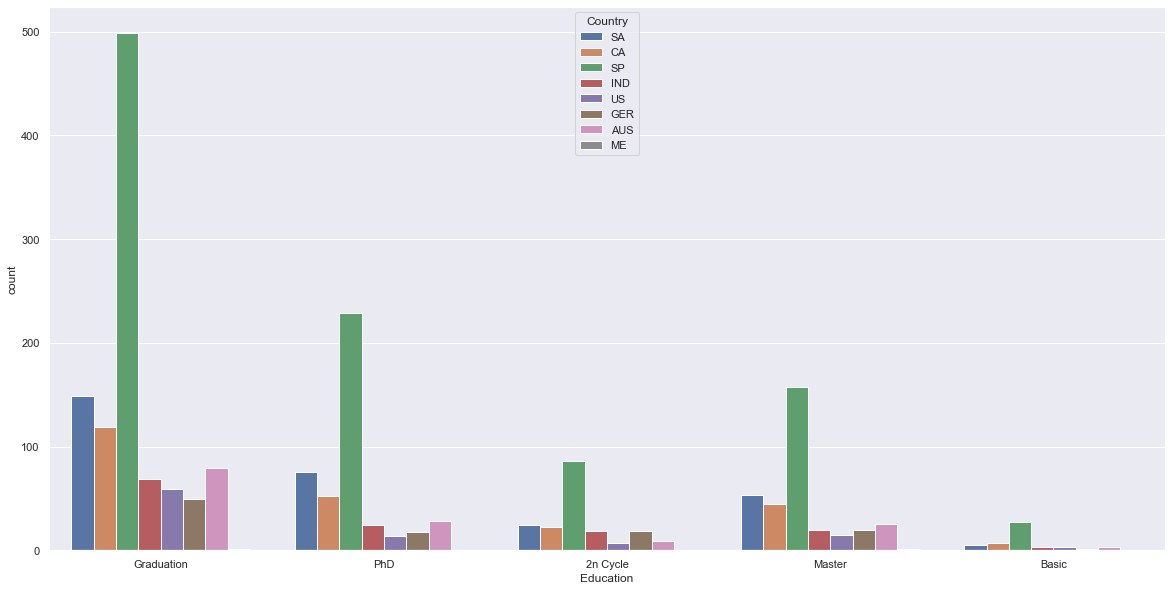

In [38]:
sns.countplot(data=data, x='Education', hue='Country')

**There are also outliers in terms of age, we'll fill them with mean age for it's education level and number of kids**

In [39]:
data[data['Age'] > 100]

ID  Year_Birth Education Marital_Status   Income  Kidhome  Teenhome  \
827    1150        1899       PhD       Together  83532.0        0         0   
2233   7829        1900  2n Cycle       Divorced  36640.0        1         0   
513   11004        1893  2n Cycle         Single  60182.0        0         1   

     Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
827   2013-09-26       36       755  ...                  1             0   
2233  2013-09-26       99        15  ...                  5             0   
513   2014-05-17       23         8  ...                  4             0   

      AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Response  \
827              0             1             0             0         0   
2233             0             0             0             0         0   
513              0             0             0             0         0   

      Complain  Country  Age  
827          0       SP  115  
2233         1      IND  114  
513          0       SA  121  

[3 rows x 29 columns]

In [40]:
mod_data = data[data['Age'] < 100]

In [41]:
print('count')
print(mod_data.loc[(mod_data['Teenhome'] == 1 ) & (mod_data['Kidhome'] == 0) &
              (mod_data['Education'] == '2n Cycle'), 'Age'].shape[0])
print('mean')
print(mod_data.loc[(mod_data['Teenhome'] == 1 ) & (mod_data['Kidhome'] == 0) &
              (mod_data['Education'] == '2n Cycle'), 'Age'].mean())

count
40
mean
46.55


In [42]:
print('count')
print(mod_data.loc[(mod_data['Teenhome'] == 0 ) & (mod_data['Kidhome'] == 0) &
              (mod_data['Education'] == 'PhD'), 'Age'].shape[0])
print('mean')
print(mod_data.loc[(mod_data['Teenhome'] == 0 ) & (mod_data['Kidhome'] == 0) &
              (mod_data['Education'] == 'PhD'), 'Age'].mean())

count
119
mean
46.857142857142854


In [43]:
print('count')
print(mod_data.loc[(mod_data['Teenhome'] == 0 ) & (mod_data['Kidhome'] == 1) &
              (mod_data['Education'] == '2n Cycle'), 'Age'].shape[0])
print('mean')
print(mod_data.loc[(mod_data['Teenhome'] == 0 ) & (mod_data['Kidhome'] == 1) &
              (mod_data['Education'] == '2n Cycle'), 'Age'].mean())

count
54
mean
33.166666666666664


In [44]:
data.loc[513, 'Age'] = 47
data.loc[513, 'Year_Birth'] = 2014 - 47
data.loc[827, 'Age'] = 47
data.loc[827, 'Year_Birth'] = 2014 - 47
data.loc[2233, 'Age'] = 33
data.loc[2233, 'Year_Birth'] = 2014 - 33

### Amount of spent

In [45]:
amnt_columns = [column for column in data.columns if 'Mnt' in column]

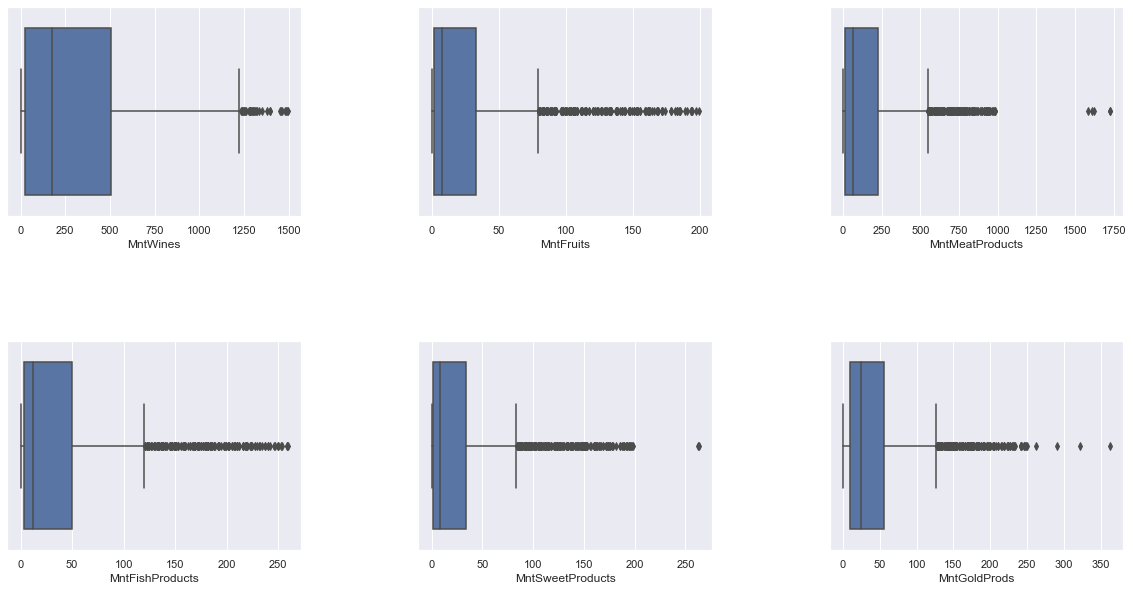

In [46]:
subplots(sns.boxplot, data=data, rows=2, cols=3, x=amnt_columns)

#### Overall amount of spent for each client

In [47]:
data['MntOverall'] = 0
for column in amnt_columns:
    data['MntOverall'] =+ data[column]

<AxesSubplot:xlabel='MntOverall'>

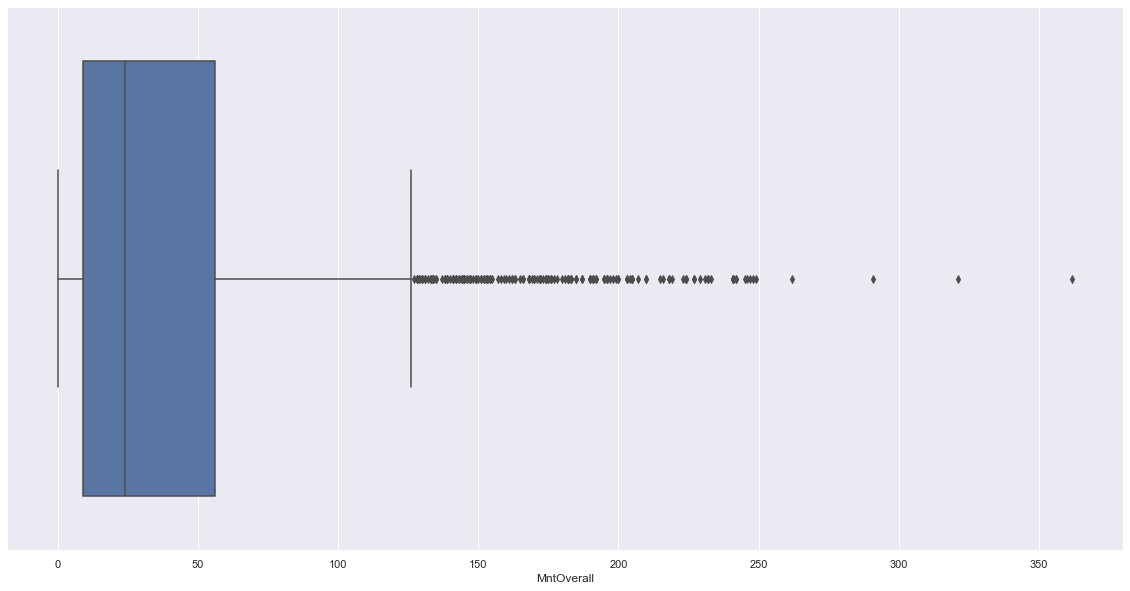

In [48]:
sns.boxplot(data=data, x='MntOverall')

**In later steps we'll segment clients by these variables**

### Numbers of purchases/visits

In [49]:
nmb_columns = [column for column in data.columns if 'Num' in column]

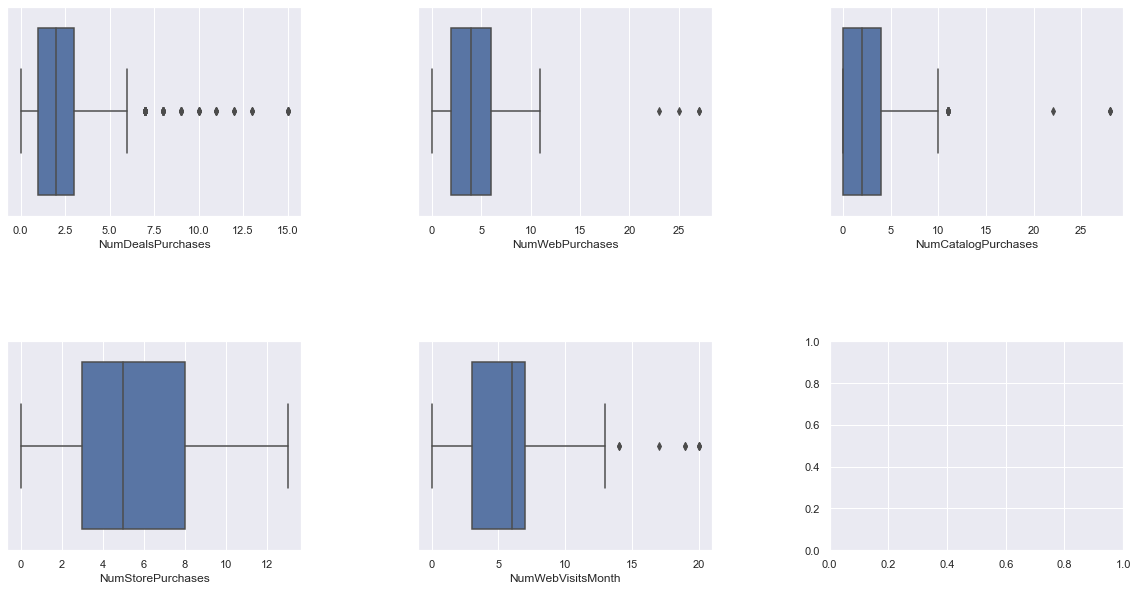

In [50]:
subplots(sns.boxplot, data=data, rows=2, cols=3, x=nmb_columns)

In [51]:
data['PurOverall'] = 0
for column in nmb_columns:
    data['PurOverall'] =+ data[column]

<AxesSubplot:xlabel='PurOverall'>

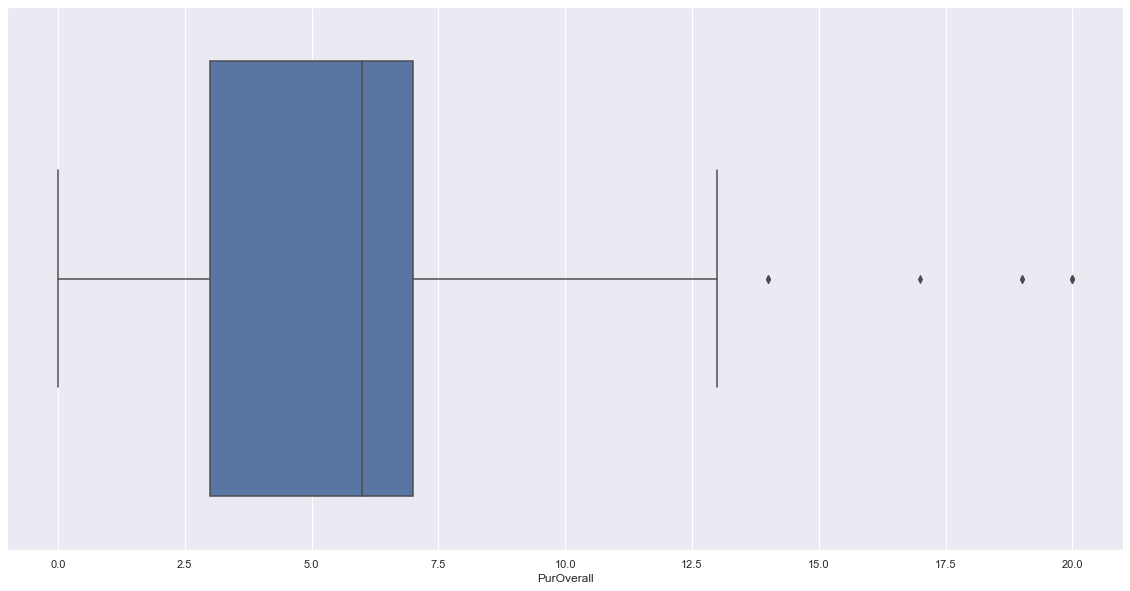

In [52]:
sns.boxplot(data=data, x='PurOverall')

### Marital Status

In [53]:
data['Marital_Status'].unique()

array(['Married', 'Single', 'Widow', 'Divorced', 'Together', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

Single and alone are the same categories <br>
YOLO (you only live once) and Absurd are incorrect.

<AxesSubplot:xlabel='Marital_Status', ylabel='count'>

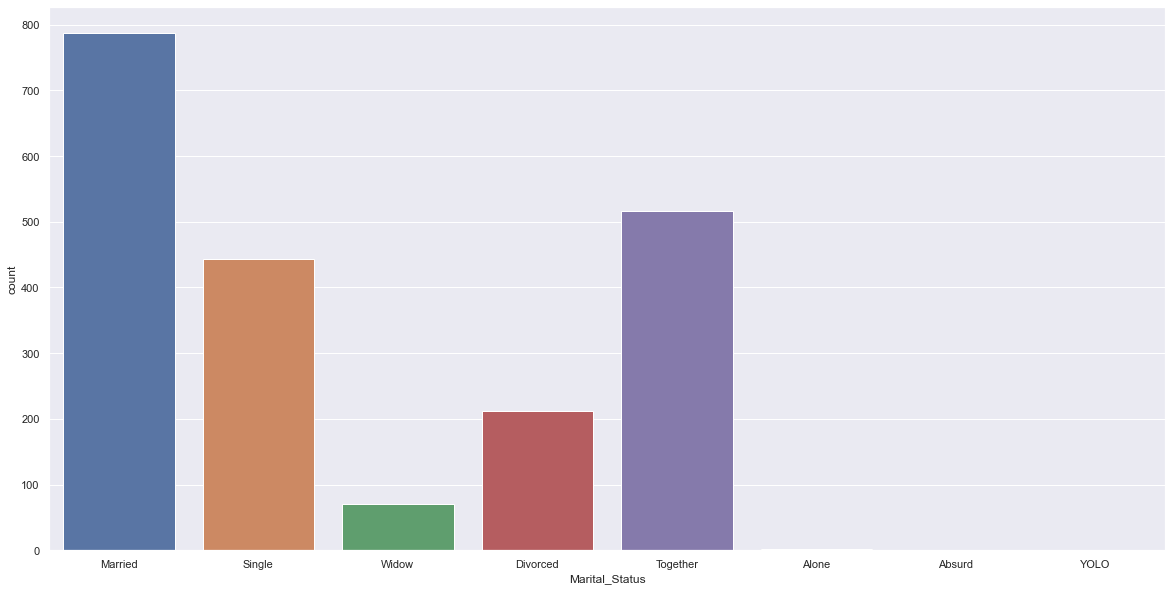

In [54]:
sns.countplot(data=data, x='Marital_Status')

In [55]:
data.loc[data['Marital_Status'] == 'Absurd']

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
1339  7734        1993  Graduation         Absurd  79244.0        0         0   

     Dt_Customer  Recency  MntWines  ...  AcceptedCmp4  AcceptedCmp5  \
1339  2012-12-19       58       471  ...             0             1   

      AcceptedCmp1  AcceptedCmp2  Response  Complain  Country  Age  \
1339             1             0         1         0      AUS   21   

      MntOverall  PurOverall  
1339         245           1  

[1 rows x 31 columns]

In [56]:
data.loc[data['Marital_Status'] == 'YOLO']

ID  Year_Birth Education Marital_Status   Income  Kidhome  Teenhome  \
104  11133        1973       PhD           YOLO  48432.0        0         1   

    Dt_Customer  Recency  MntWines  ...  AcceptedCmp4  AcceptedCmp5  \
104  2012-10-18        3       322  ...             0             0   

     AcceptedCmp1  AcceptedCmp2  Response  Complain  Country  Age  MntOverall  \
104             0             0         1         0      IND   41          42   

     PurOverall  
104           8  

[1 rows x 31 columns]

We'll assume that people are single

In [57]:
data.loc[data['Marital_Status'] == 'YOLO', 'Marital_Status'] = 'Single'
data.loc[data['Marital_Status'] == 'Absurd', 'Marital_Status'] = 'Single'

<AxesSubplot:xlabel='Marital_Status', ylabel='count'>

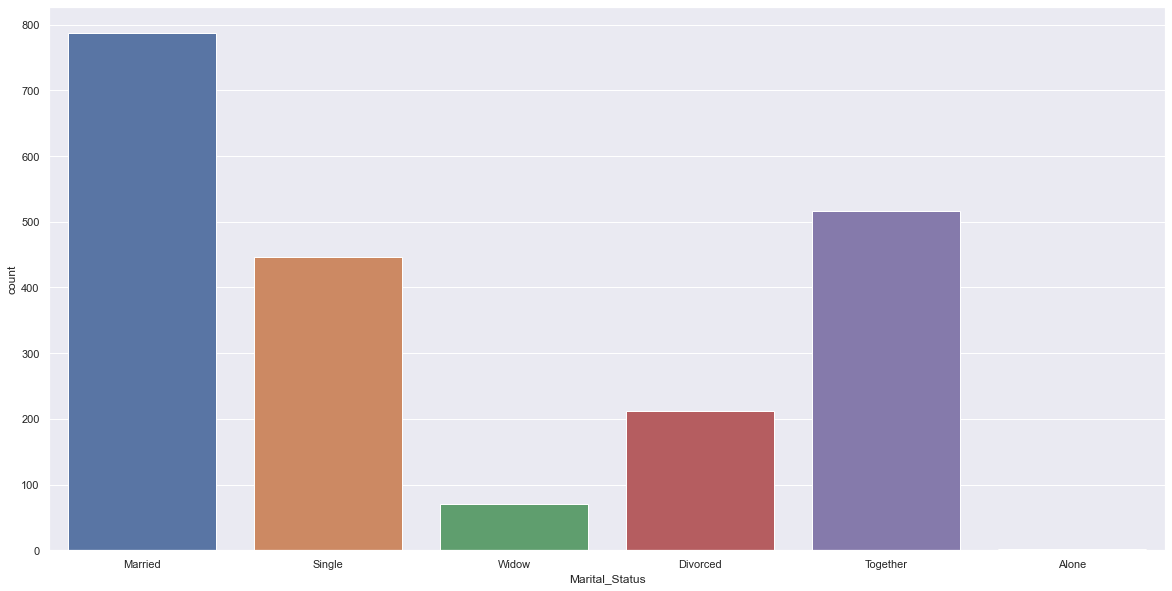

In [58]:
sns.countplot(data=data, x='Marital_Status')

## New variables

**Client have accepted any campaign offer or not? If so how many?** 

In [59]:
#Have accepted any?
def accepted_campaign(row):
    for i in range(1, 6):
        if row['AcceptedCmp' + str(i)] == 1:
            return 1
    if row['Response'] == 1:
        return 1
    return 0

#Number campaigns accepted
def nmb_accepted_campaign(row):
    count = 0
    for i in range(1, 6):
        if row['AcceptedCmp' + str(i)] == 1:
            count += 1
    if row['Response'] == 1:
        count += 1
    return count

In [60]:
data['AcceptedCmpAny'] = data.apply(accepted_campaign, axis=1)

<AxesSubplot:xlabel='AcceptedCmpAny', ylabel='count'>

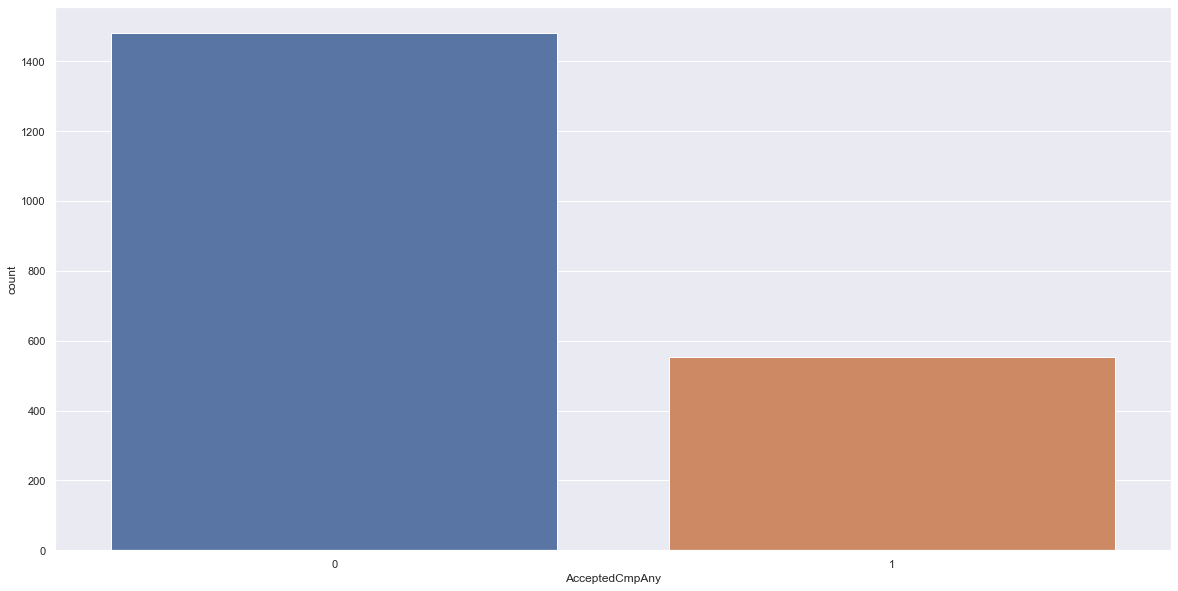

In [61]:
sns.countplot(data=data, x='AcceptedCmpAny')

In [62]:
data['NumAcceptedCmp'] = data.apply(nmb_accepted_campaign, axis=1)

<AxesSubplot:xlabel='NumAcceptedCmp', ylabel='count'>

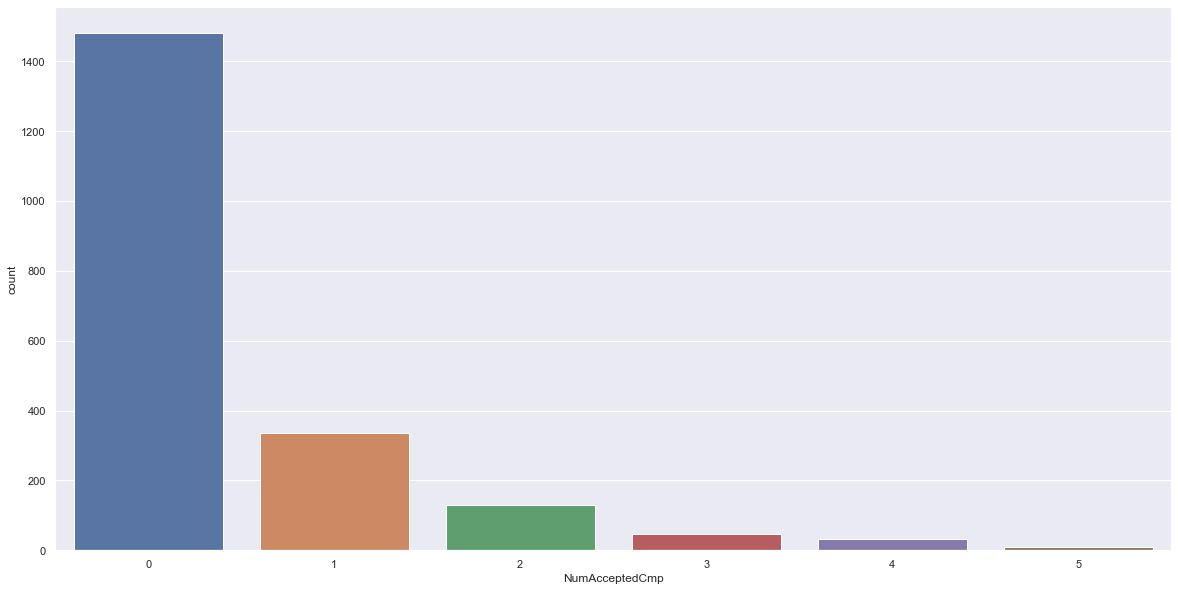

In [63]:
sns.countplot(data=data, x='NumAcceptedCmp')

### Age segmentation

In [64]:
data[data['Age'] < 18]

Empty DataFrame
Columns: [ID, Year_Birth, Education, Marital_Status, Income, Kidhome, Teenhome, Dt_Customer, Recency, MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, AcceptedCmp1, AcceptedCmp2, Response, Complain, Country, Age, MntOverall, PurOverall, AcceptedCmpAny, NumAcceptedCmp]
Index: []

[0 rows x 33 columns]

In [65]:
def age_segmentation(row):
    if 18 <= row['Age'] <= 24:
        return '18-24'
    elif 25 <= row['Age'] <= 34:
        return '25-34'
    elif 35 <= row['Age'] <= 44:
        return '35-44'
    elif 45 <= row['Age'] <= 54:
        return '45-54'
    elif 55 <= row['Age'] <= 65:
        return '55-65'
    else: return '65+'

In [66]:
data['Age']

1503    29
1       53
1311    67
1834    43
2237    38
        ..
1554    42
1925    65
529     36
1897    57
261     28
Name: Age, Length: 2035, dtype: int64

In [67]:
data['AgeSegment'] = data.apply(age_segmentation, axis=1)

<AxesSubplot:xlabel='AgeSegment', ylabel='count'>

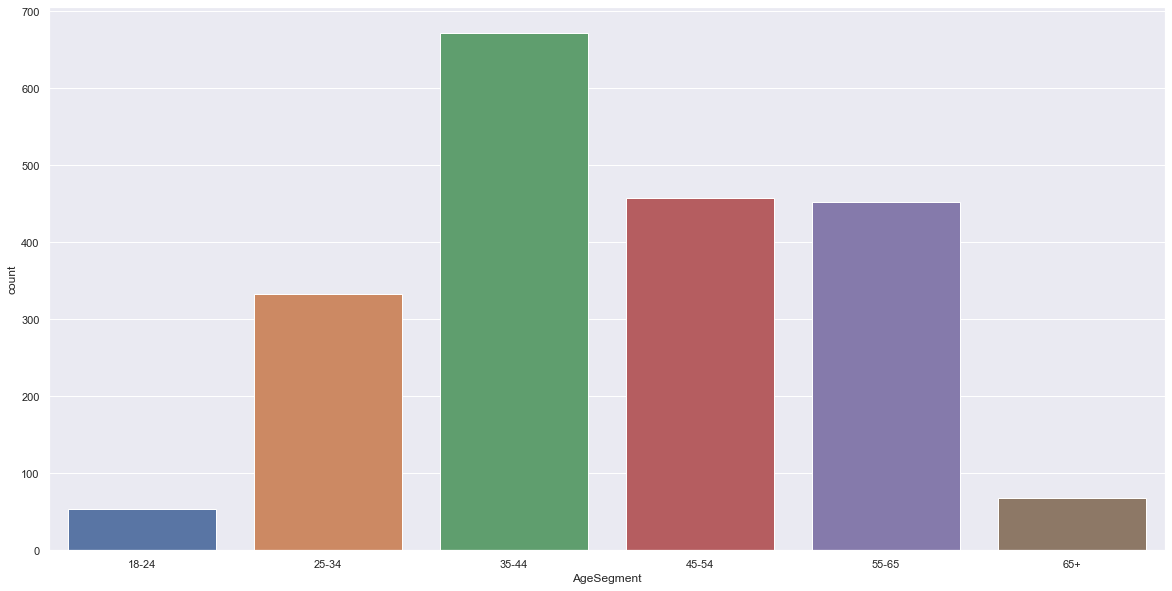

In [68]:
sns.countplot(data=data, x='AgeSegment', order=['18-24', '25-34', '35-44', '45-54', '55-65', '65+'])

### Income segmentation

In [69]:
data['Income'].describe()

count      2011.000000
mean      52059.047240
std       21625.221731
min        1730.000000
25%       35482.000000
50%       51537.000000
75%       68641.000000
max      162397.000000
Name: Income, dtype: float64

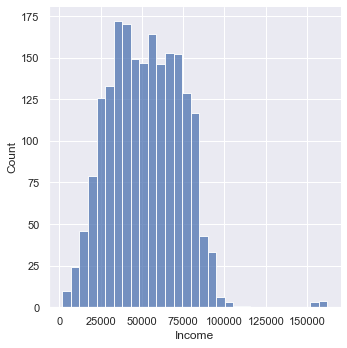

In [70]:
sns.displot(data=data, x='Income')

In [71]:
q05 = data['Income'].quantile(0.05)
q25 = data['Income'].quantile(0.25)
q75 = data['Income'].quantile(0.75)
q95 = data['Income'].quantile(0.95)
quantiles = [q05, q25, q75, q95]

In [72]:
def income_segmentation(row, quantiles):
    if row['Income'] <= quantiles[0]:
        return 'VeryLow'
    elif quantiles[0] < row['Income'] <= quantiles[1]:
        return 'Low'
    elif quantiles[1] < row['Income'] <= quantiles[2]:
        return 'Middle'
    elif quantiles[2] < row['Income'] <= quantiles[3]:
        return 'High'
    elif row['Income'] > quantiles[3]:
        return 'VeryHigh'

In [73]:
data['IncomeSegment'] = data.apply(lambda row: income_segmentation(row, quantiles), axis=1)

<AxesSubplot:xlabel='IncomeSegment', ylabel='count'>

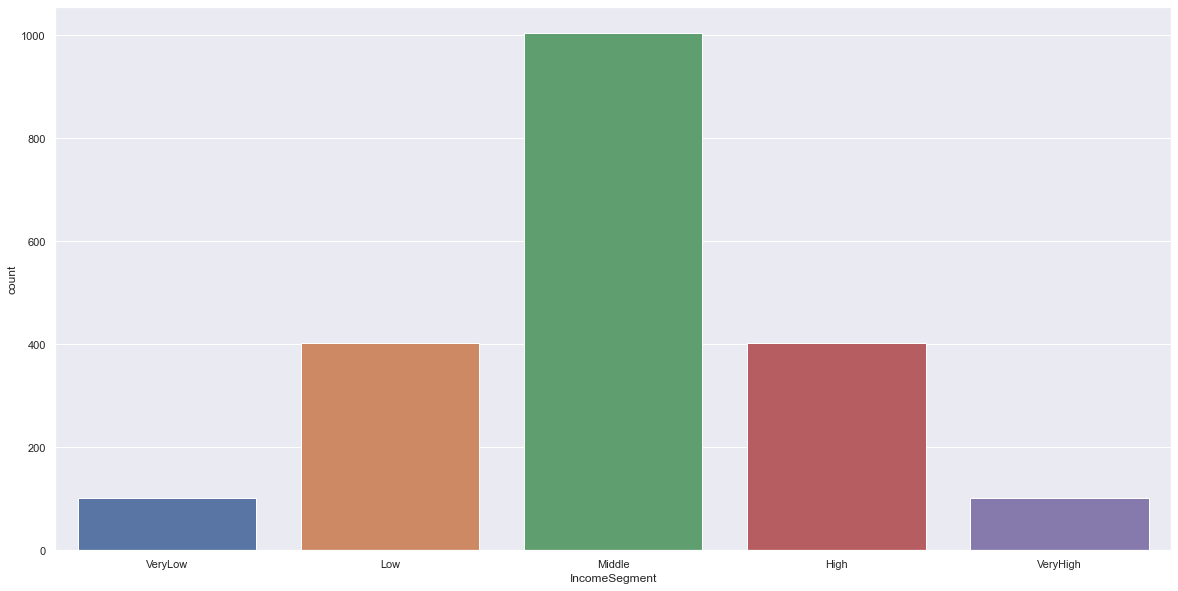

In [74]:
sns.countplot(data=data, x='IncomeSegment', order=['VeryLow', 'Low', 'Middle', 'High', 'VeryHigh'])

### Number of children

In [75]:
def children(row):
    return row['Kidhome'] + row['Teenhome']

In [76]:
data['Children'] = data.apply(children, axis=1)

### New csv

In [77]:
data.to_csv('refactored_data.csv')

# Statistical Analysis

### What factors are significantly related to the number of store purchases?

<AxesSubplot:>

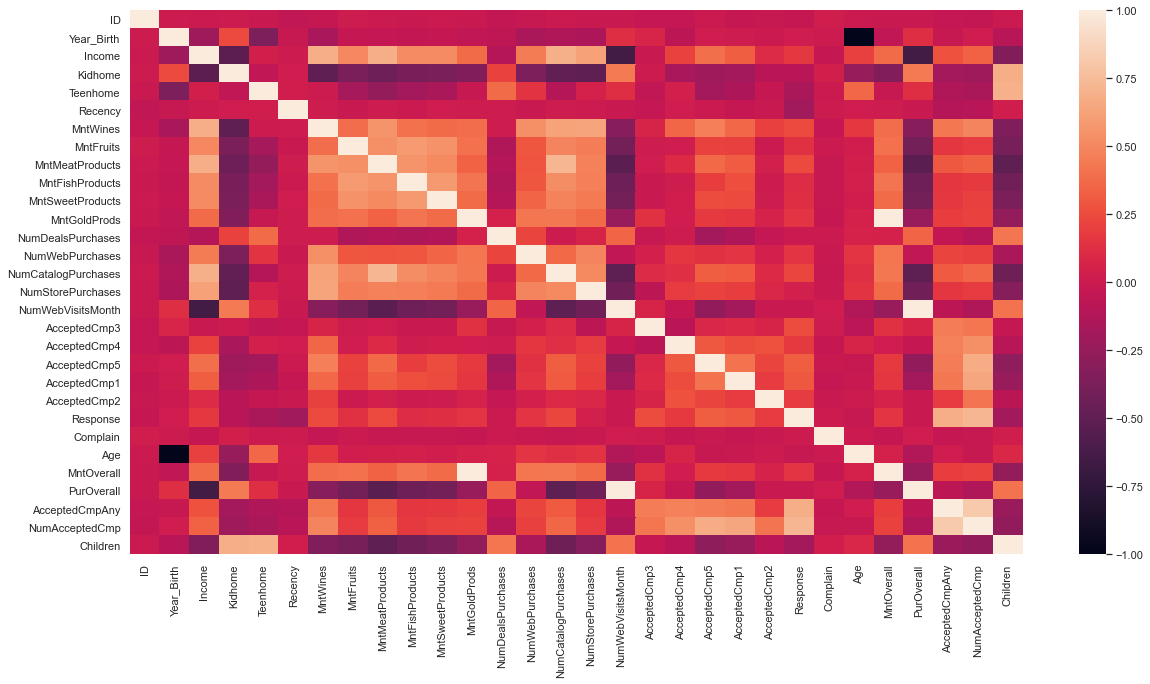

In [78]:
corr = data.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

Positive correlation between clients **income** and **number of purchases**. The most strong correlation are Catalog and Store purchases.

<AxesSubplot:xlabel='Income', ylabel='NumCatalogPurchases'>

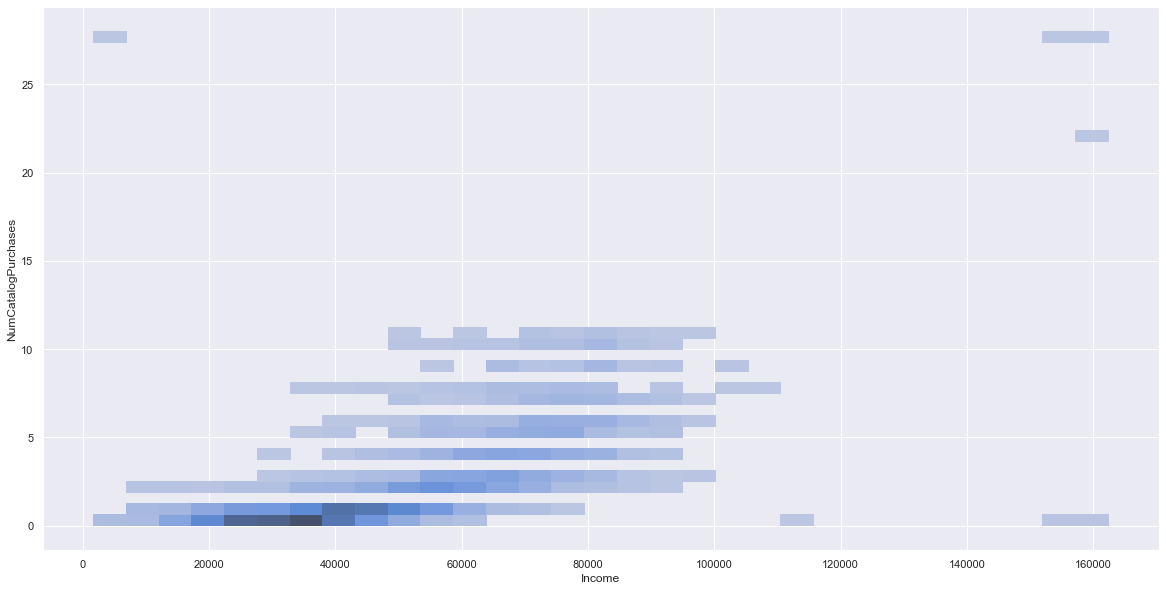

In [79]:
sns.histplot(data=data, x='Income', y='NumCatalogPurchases')

<AxesSubplot:xlabel='Income', ylabel='NumStorePurchases'>

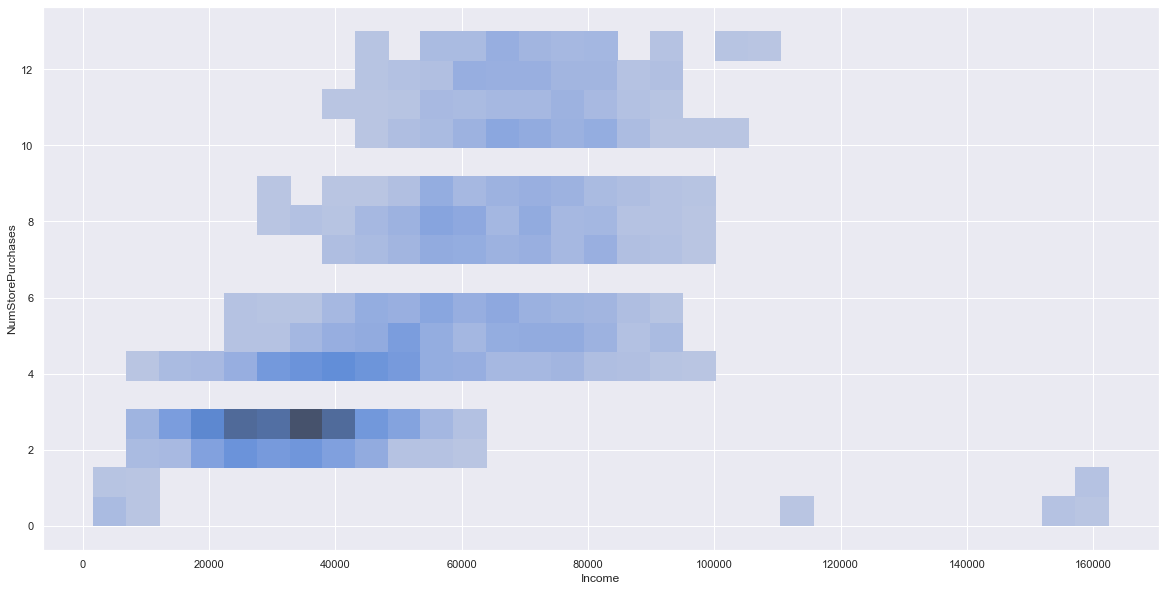

In [80]:
sns.histplot(data=data, x='Income', y='NumStorePurchases')

<AxesSubplot:xlabel='Income', ylabel='NumWebPurchases'>

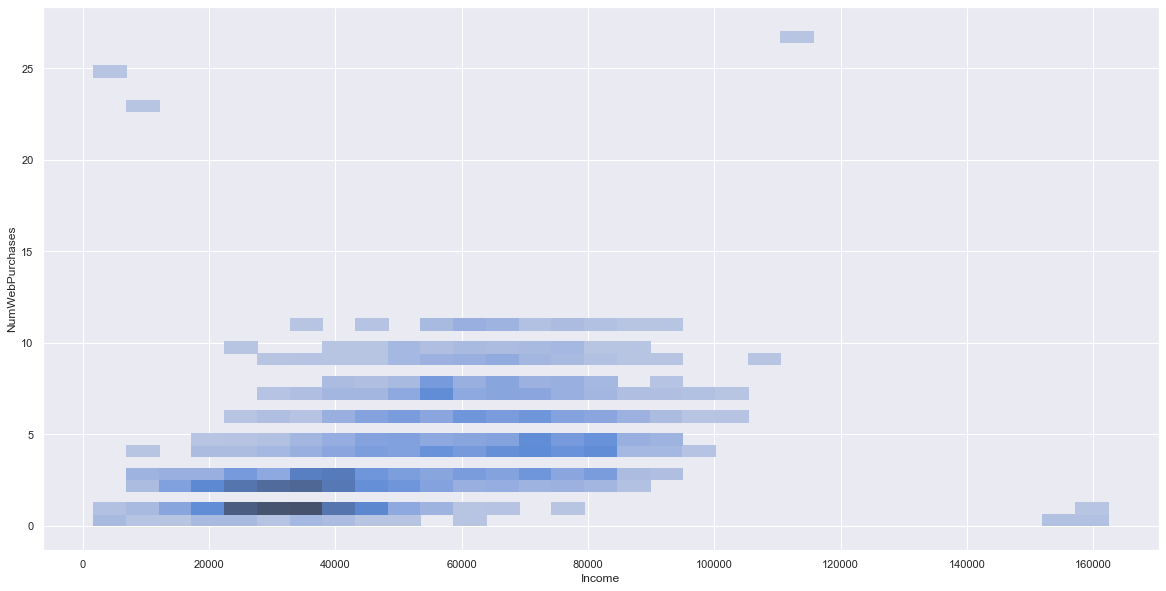

In [81]:
sns.histplot(data=data, x='Income', y='NumWebPurchases')

More children client have, more deals with discount he make usually.

<AxesSubplot:xlabel='Children', ylabel='NumDealsPurchases'>

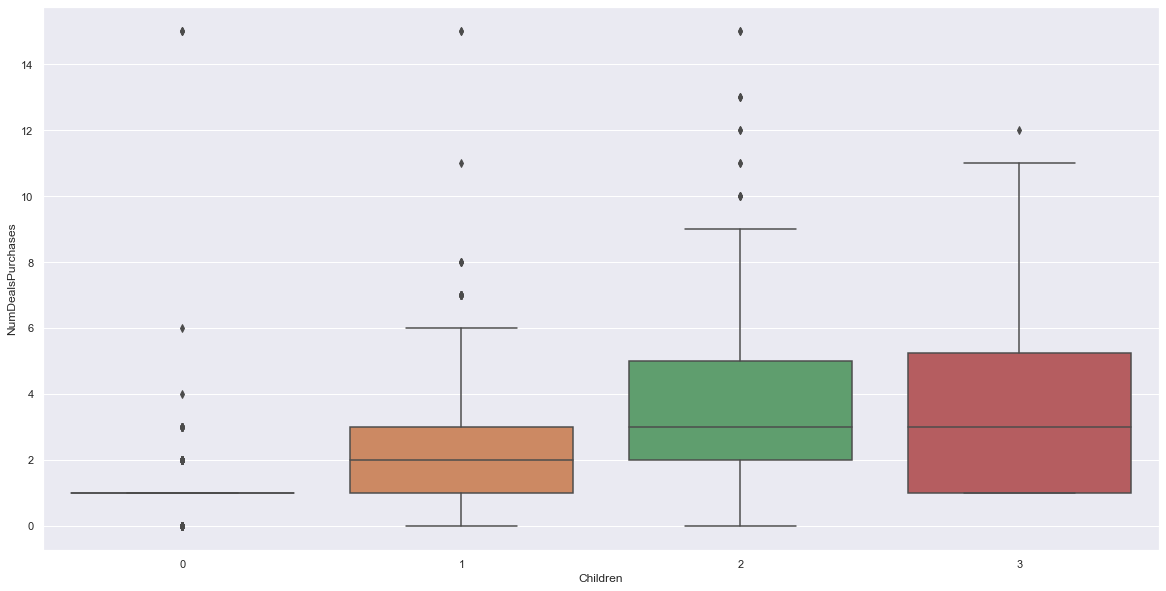

In [82]:
sns.boxplot(data=data, x='Children', y='NumDealsPurchases')

### Does US fare significantly better than the Rest of the World in terms of total purchases?

In [83]:
def us_rest(row):
    if row['Country'] == 'US':
        return 'US'
    else:
        return 'Rest'

In [84]:
data['US_rest'] = data.apply(us_rest, axis=1)

<AxesSubplot:xlabel='IncomeSegment', ylabel='count'>

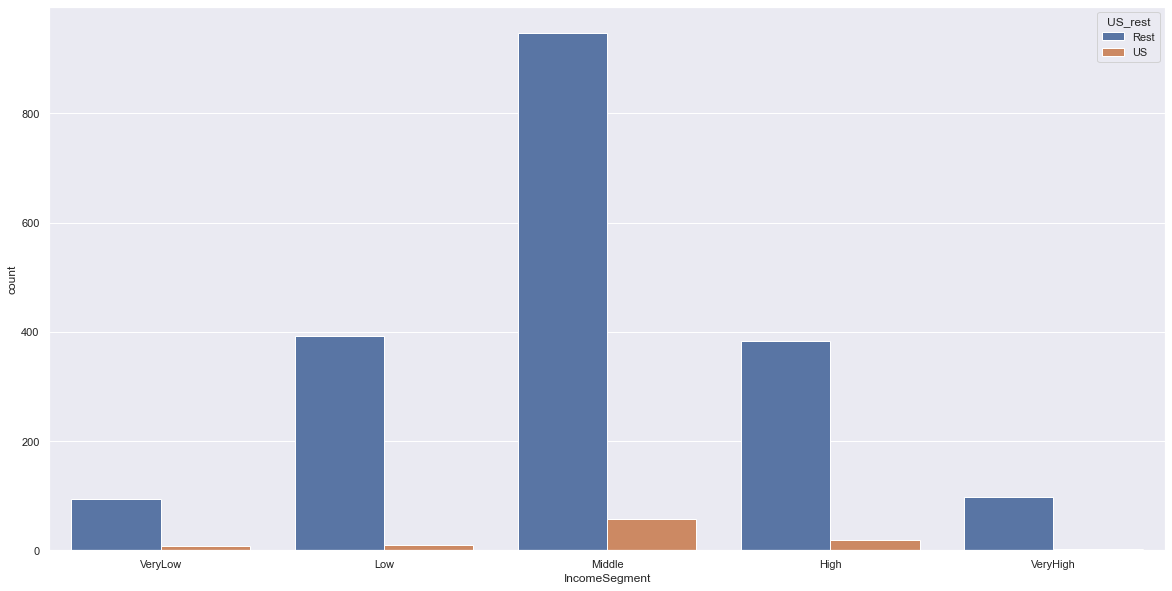

In [85]:
sns.countplot(data=data, x='IncomeSegment', hue='US_rest', order=['VeryLow', 'Low', 'Middle', 'High', 'VeryHigh'])

In [86]:
print(data['PurOverall'])

1503    1
1       5
1311    6
1834    5
2237    8
       ..
1554    7
1925    0
529     5
1897    5
261     6
Name: PurOverall, Length: 2035, dtype: int64


<AxesSubplot:xlabel='US_rest', ylabel='PurOverall'>

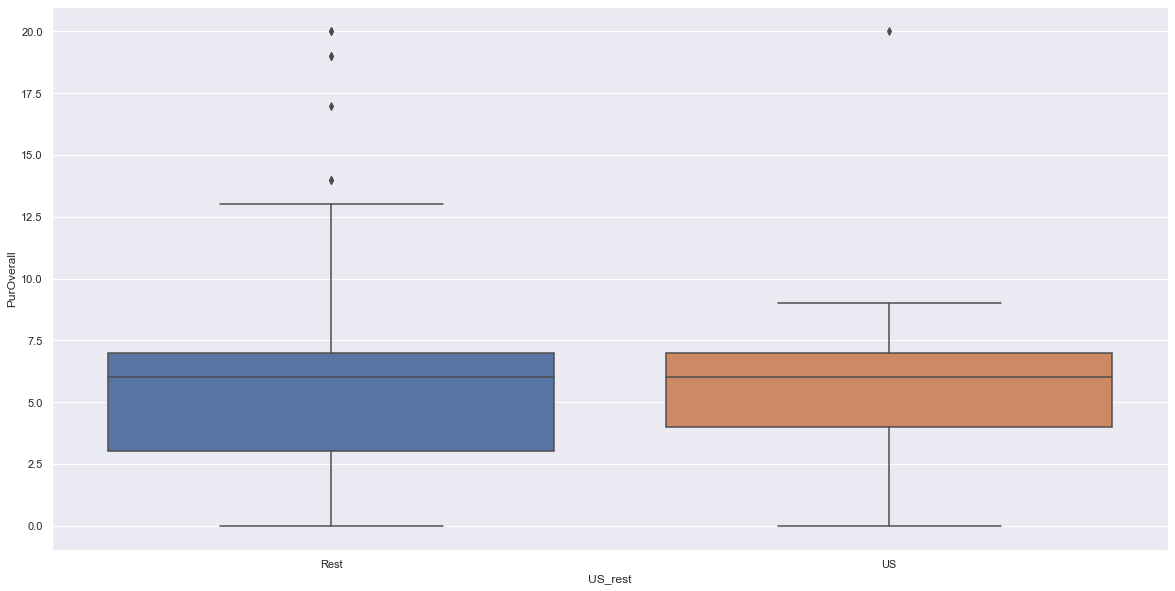

In [87]:
sns.boxplot(data=data, y='PurOverall', x='US_rest')

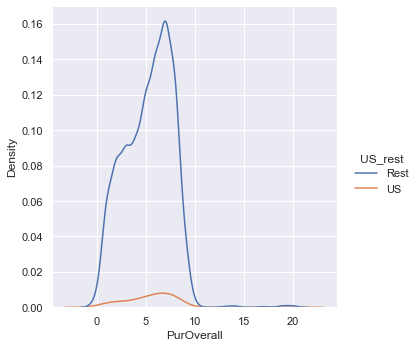

In [88]:
sns.displot(data=data, x='PurOverall', kind='kde', hue='US_rest')

#### Mann-Whitney test

In [89]:
p_value = 0.05

In [90]:
stat, p = mannwhitneyu(data.loc[data['US_rest'] == 'Rest', 'PurOverall'],
            data.loc[data['US_rest'] == 'US', 'PurOverall'],
            alternative='less')

In [91]:
if p < p_value:
    print('''Null hypothesis is rejected, US fare significantly better than
          the Rest of the World in terms of total purchases''')
else:
    print('Not enough significance to reject null hypothesis, US and Rest of the World fare equally')

Not enough significance to reject null hypothesis, US and Rest of the World fare equally


### Your supervisor insists that people who buy gold are more conservative. Therefore, people who spent an above average amount on gold in the last 2 years would have more in store purchases. Justify or refute this statement using an appropriate statistical test


We'll check the linear rank correlation between those variables, as there are not continuous.

<AxesSubplot:xlabel='NumStorePurchases', ylabel='MntGoldProds'>

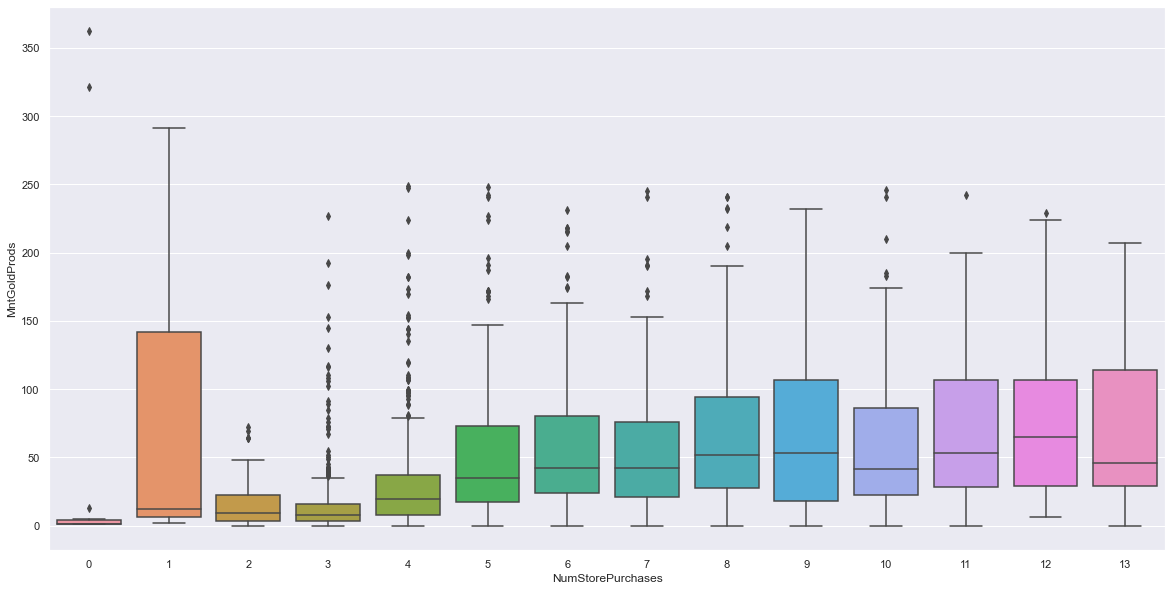

In [92]:
sns.boxplot(data=data, x='NumStorePurchases', y='MntGoldProds')

In [93]:
print('Spearman rank corr coeff')
print(data['NumStorePurchases'].corr(data['MntGoldProds'], method='spearman'))

Spearman rank corr coeff
0.5377007796755707


**We'll check the hypothesis using Spearman correlation test**

In [94]:
p_value = 0.05

In [95]:
corr, p = spearmanr(data['NumStorePurchases'], data['MntGoldProds'])

In [96]:
if p < p_value:
    if corr > 0: print('Null hypothesis rejected, positive corr between variables')
    else: print('Null hypothesis rejected, negative corr between variables')
else:
    print('Null hypothesis rejection failed, so there is no significant correlation between variables')

Null hypothesis rejected, positive corr between variables


### Fish has Omega 3 fatty acids which are good for the brain. Accordingly, do "Married PhD candidates" have a significant relation with amount spent on fish? What other factors are significantly related to amount spent on fish?

In [97]:
def married_phd(row):
    if (row['Marital_Status'] == 'Married') & (row['Education'] == 'PhD'):
        return 'Married_PhD'
    else:
        return 'Other'

In [98]:
data['MarPhd'] = data.apply(married_phd, axis=1)

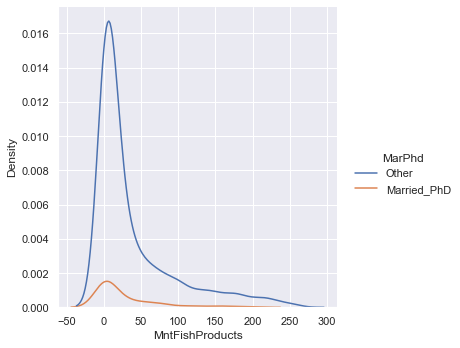

In [99]:
sns.displot(data=data, hue='MarPhd', kind='kde', x='MntFishProducts')

<AxesSubplot:xlabel='MarPhd', ylabel='MntFishProducts'>

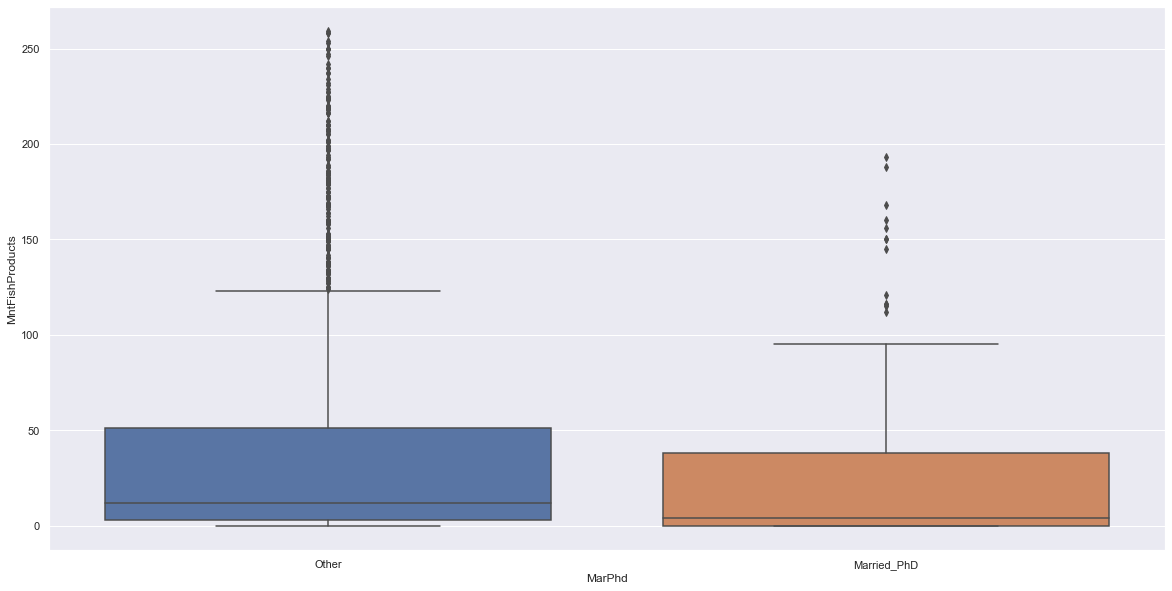

In [100]:
sns.boxplot(data=data, x='MarPhd', y='MntFishProducts')

Despite the predictions, married clients with PhD probably spend less money on fish products.

#### Mann-Whitney test

In [101]:
p_value = 0.05

In [102]:
stat, p = mannwhitneyu(data.loc[data['MarPhd'] == 'Other', 'MntFishProducts'],
            data.loc[data['MarPhd'] == 'Married_PhD', 'MntFishProducts'],
            alternative='greater')

In [103]:
if p < p_value:
    print('''Null hypothesis is rejected, married clients with PhD spend less money on fish products''')
else:
    print('''Not enough significance to reject null hypothesis, married clients with PhD spend money on fish products as others''')

Null hypothesis is rejected, married clients with PhD spend less money on fish products


## Is there a significant relationship between geographical regional and success of a campaign?

### Analysis of campaigns

In [104]:
data['CountryCode'] = data['Country'].replace({'SA':'ZAF', 'CA':'CAN', 'SP':'ESP', 'IND':'IND',
                                          'US':'USA', 'GER':'GER', 'AUS':'AUS', 'ME':'MEX'})

In [105]:
data['Country'] = data['Country'].replace({'SA':'South Africa', 'CA':'Canada', 'SP':'Spain', 'IND':'India',
                                          'US':'United States', 'GER':'Germany', 'AUS':'Australia', 'ME':'Mexico'})

In [106]:
campaigns = data[['CountryCode', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']].melt(
    id_vars='CountryCode', var_name='Campaign', value_name='Accepted (%)')
campaigns = pd.DataFrame(campaigns.groupby(['CountryCode', 'Campaign'])['Accepted (%)'].mean()*100).reset_index(drop=False)
campaigns['Campaign'] = campaigns['Campaign'].replace({'AcceptedCmp1': '1',
                                                'AcceptedCmp2': '2',
                                                'AcceptedCmp3': '3',
                                                'AcceptedCmp4': '4',
                                                'AcceptedCmp5': '5',
                                                 'Response': 'Most recent'
                                                })

In [107]:
fig = px.choropleth(campaigns, locationmode='ISO-3', color='Accepted (%)', facet_col='Campaign', facet_col_wrap=2,
                    facet_row_spacing=0.05, facet_col_spacing=0.01, width=1000,
                    locations='CountryCode', projection='equirectangular', title='Percentage of clients', 
                   )
fig.show()

In [108]:
campaigns = data[['CountryCode', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4'
                  , 'AcceptedCmp5', 'Response']].melt(
    id_vars='CountryCode', var_name='Campaign', value_name='Accepted'
)
campaigns = pd.DataFrame(campaigns.groupby(['CountryCode', 'Campaign'])['Accepted'].agg('sum')).reset_index(drop=False)
campaigns['Campaign'] = campaigns['Campaign'].replace({'AcceptedCmp1': '1',
                                                'AcceptedCmp2': '2',
                                                'AcceptedCmp3': '3',
                                                'AcceptedCmp4': '4',
                                                'AcceptedCmp5': '5',
                                                 'Response': 'Most recent'
                                                })

In [109]:
fig = px.choropleth(campaigns, locationmode='ISO-3', color='Accepted', facet_col='Campaign', facet_col_wrap=2,
                    facet_row_spacing=0.05, facet_col_spacing=0.01, width=1000,
                    locations='CountryCode', projection='equirectangular', title='Absolute number of clients', 
                   )
fig.show()

**Clients from Spain are the most active in terms of accepting campaign offers. Other countries (except Mexico, from where there are only 2 clients) are on the same level, around 10% rate.** <br>

**The best campaign is the latest, it attracted the biggest amount of clients from every country.**<br>

**The worst campaign was the second one. The acceptance rate is very low for every country including Spain.
Also there were no clients from USA who accepted 2nd campaign offer.**


In [ ]:
data.to_csv('refactored.csv')

# Unpivot for tableau

In [ ]:
unpivot = pd.melt(data, id_vars=['ID'], value_vars=['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3',
                                          'AcceptedCmp4', 'AcceptedCmp5', 'Response'],
       var_name='Campaign')

In [121]:
unpivot.to_csv('unpivot.csv')